## Dynamics of Instagram users
**Author**: Silvere Cawet <br/>
**Date**: 14 April 2023 <br/>
**Source**: https://www.kaggle.com/datasets/iabdulw/dynamics-of-instagram-users <br/>
**Github url**: something <br/>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from pandas.plotting import scatter_matrix
import matplotlib as plt
import seaborn as sbn

data_file = r'data\instagram_dataset.xlsx'

df = pd.read_excel(data_file)

### Data Sample

In [2]:
df.head(10)

,Users,Number of Posts,Number of Followers,Number of Followings,Number of Likes for the Tenth Previous Post,Number of Likes for the Eleventh Previous Post,Number of Likes for the Twelfth Previous Post,Number of Self-Presenting Posts from Nine Previous Posts,Gender
0,User-1,486,279,19,15,10,17,0,m
1,User-2,401,5509,342,360,440,428,0,f
2,User-3,463,453,293,65,68,149,4,f
3,User-4,154,1231,1477,53,22,35,3,m
4,User-5,786,9620,421,623,1299,544,0,m
5,User-6,490,7702,379,190,198,188,4,f
6,User-7,405,1282,370,123,135,145,2,m
7,User-8,638,2312,365,466,511,318,0,m
8,User-9,73,1819,852,343,435,333,0,f
9,User-10,600,2056,606,130,102,160,1,f


### Remove `Users` column

In [3]:
df.drop(df.columns[0], axis = 1, inplace = True)
df.head(10)

,Number of Posts,Number of Followers,Number of Followings,Number of Likes for the Tenth Previous Post,Number of Likes for the Eleventh Previous Post,Number of Likes for the Twelfth Previous Post,Number of Self-Presenting Posts from Nine Previous Posts,Gender
0,486,279,19,15,10,17,0,m
1,401,5509,342,360,440,428,0,f
2,463,453,293,65,68,149,4,f
3,154,1231,1477,53,22,35,3,m
4,786,9620,421,623,1299,544,0,m
5,490,7702,379,190,198,188,4,f
6,405,1282,370,123,135,145,2,m
7,638,2312,365,466,511,318,0,m
8,73,1819,852,343,435,333,0,f
9,600,2056,606,130,102,160,1,f


### Replace 'm' with 1 and 'f' with 0 in the `Gender` column

In [4]:
df['Gender'] = df['Gender'].replace({'m': 1, 'f': 0})
df.head(10)

,Number of Posts,Number of Followers,Number of Followings,Number of Likes for the Tenth Previous Post,Number of Likes for the Eleventh Previous Post,Number of Likes for the Twelfth Previous Post,Number of Self-Presenting Posts from Nine Previous Posts,Gender
0,486,279,19,15,10,17,0,1
1,401,5509,342,360,440,428,0,0
2,463,453,293,65,68,149,4,0
3,154,1231,1477,53,22,35,3,1
4,786,9620,421,623,1299,544,0,1
5,490,7702,379,190,198,188,4,0
6,405,1282,370,123,135,145,2,1
7,638,2312,365,466,511,318,0,1
8,73,1819,852,343,435,333,0,0
9,600,2056,606,130,102,160,1,0


## Descriptive Statistics

In [5]:
df.describe()

,Number of Posts,Number of Followers,Number of Followings,Number of Likes for the Tenth Previous Post,Number of Likes for the Eleventh Previous Post,Number of Likes for the Twelfth Previous Post,Number of Self-Presenting Posts from Nine Previous Posts,Gender
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,425.202000,1542.06100,1979.402000,114.621000,112.477000,114.923000,4.014000,0.50000
std,671.586881,1978.69823,2013.881415,197.677054,192.674074,202.001628,3.180239,0.50025
min,33.000000,16.00000,11.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,101.000000,357.00000,500.750000,20.000000,19.000000,19.000000,1.000000,0.00000
50%,203.000000,769.00000,1112.500000,47.500000,51.000000,51.000000,4.000000,0.50000
75%,459.500000,1710.25000,2778.000000,119.500000,116.000000,119.500000,7.000000,1.00000
max,7733.000000,9953.00000,7735.000000,1620.000000,1956.000000,1806.000000,9.000000,1.00000


### Mean

In [6]:
print(df.mean(numeric_only=True))

Number of Posts                                              425.202
Number of Followers                                         1542.061
Number of Followings                                        1979.402
Number of Likes for the Tenth Previous Post                  114.621
Number of Likes for the Eleventh Previous Post               112.477
Number of Likes for the Twelfth Previous Post                114.923
Number of Self-Presenting Posts from Nine Previous Posts       4.014
Gender                                                         0.500
dtype: float64


### Median

In [7]:
print(df.median())

Number of Posts                                              203.0
Number of Followers                                          769.0
Number of Followings                                        1112.5
Number of Likes for the Tenth Previous Post                   47.5
Number of Likes for the Eleventh Previous Post                51.0
Number of Likes for the Twelfth Previous Post                 51.0
Number of Self-Presenting Posts from Nine Previous Posts       4.0
Gender                                                         0.5
dtype: float64


### Mode

In [8]:
print(df.mode())

   Number of Posts  Number of Followers  Number of Followings  \
0             67.0                  221                 248.0   
1              NaN                  359                7500.0   
2              NaN                  366                   NaN   
3              NaN                 1108                   NaN   
4              NaN                 1247                   NaN   

   Number of Likes for the Tenth Previous Post  \
0                                         18.0   
1                                         25.0   
2                                          NaN   
3                                          NaN   
4                                          NaN   

   Number of Likes for the Eleventh Previous Post  \
0                                            12.0   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                          

### Standard Deviation

In [9]:
print(df.std())

Number of Posts                                              671.586881
Number of Followers                                         1978.698230
Number of Followings                                        2013.881415
Number of Likes for the Tenth Previous Post                  197.677054
Number of Likes for the Eleventh Previous Post               192.674074
Number of Likes for the Twelfth Previous Post                202.001628
Number of Self-Presenting Posts from Nine Previous Posts       3.180239
Gender                                                         0.500250
dtype: float64


### Kurtosis

In [10]:
print(df.kurtosis())

Number of Posts                                             38.542180
Number of Followers                                          4.788843
Number of Followings                                         0.755945
Number of Likes for the Tenth Previous Post                 20.485088
Number of Likes for the Eleventh Previous Post              23.016034
Number of Likes for the Twelfth Previous Post               24.113457
Number of Self-Presenting Posts from Nine Previous Posts    -1.365540
Gender                                                      -2.004012
dtype: float64


### Skewness

In [11]:
print(df.skew())

Number of Posts                                             5.162574
Number of Followers                                         2.256487
Number of Followings                                        1.341533
Number of Likes for the Tenth Previous Post                 4.094515
Number of Likes for the Eleventh Previous Post              4.205473
Number of Likes for the Twelfth Previous Post               4.389806
Number of Self-Presenting Posts from Nine Previous Posts    0.182163
Gender                                                      0.000000
dtype: float64


### Maximum

In [12]:
max = df.max()
print(max)

Number of Posts                                             7733
Number of Followers                                         9953
Number of Followings                                        7735
Number of Likes for the Tenth Previous Post                 1620
Number of Likes for the Eleventh Previous Post              1956
Number of Likes for the Twelfth Previous Post               1806
Number of Self-Presenting Posts from Nine Previous Posts       9
Gender                                                         1
dtype: int64


### Minimum

In [13]:
min = df.min()
print(min)

Number of Posts                                             33
Number of Followers                                         16
Number of Followings                                        11
Number of Likes for the Tenth Previous Post                  0
Number of Likes for the Eleventh Previous Post               0
Number of Likes for the Twelfth Previous Post                0
Number of Self-Presenting Posts from Nine Previous Posts     0
Gender                                                       0
dtype: int64


### Range

In [14]:
print(max - min)

Number of Posts                                             7700
Number of Followers                                         9937
Number of Followings                                        7724
Number of Likes for the Tenth Previous Post                 1620
Number of Likes for the Eleventh Previous Post              1956
Number of Likes for the Twelfth Previous Post               1806
Number of Self-Presenting Posts from Nine Previous Posts       9
Gender                                                         1
dtype: int64


### Geometric Mean

In [15]:
print(stats.gmean(df))

[ 233.63572419  804.82078889 1136.34024681    0.            0.
    0.            0.            0.        ]


### Harmonic Mean

In [16]:
print(stats.hmean(df))

[153.84715815 423.98942173 538.11654221   0.           0.
   0.           0.           0.        ]


### 20th Percentile

In [17]:
for col in df.columns:
    percentile_20 = np.percentile(df[col], 20)
    print(f"{col} = {percentile_20}")

Number of Posts = 89.0
Number of Followers = 302.6
Number of Followings = 428.20000000000005
Number of Likes for the Tenth Previous Post = 16.0
Number of Likes for the Eleventh Previous Post = 15.0
Number of Likes for the Twelfth Previous Post = 15.0
Number of Self-Presenting Posts from Nine Previous Posts = 0.0
Gender = 0.0


### 80th Percentile

In [18]:
for col in df.columns:
    percentile_80 = np.percentile(df[col], 80)
    print(f"{col} = {percentile_80}")

Number of Posts = 560.0000000000002
Number of Followers = 2284.0
Number of Followings = 3369.0
Number of Likes for the Tenth Previous Post = 146.4000000000001
Number of Likes for the Eleventh Previous Post = 148.20000000000005
Number of Likes for the Twelfth Previous Post = 147.4000000000001
Number of Self-Presenting Posts from Nine Previous Posts = 8.0
Gender = 1.0


### First Quartile

In [19]:
for col in df.columns:
    q1 = np.percentile(df[col], 25)
    print(f"{col} = {q1}")

Number of Posts = 101.0
Number of Followers = 357.0
Number of Followings = 500.75
Number of Likes for the Tenth Previous Post = 20.0
Number of Likes for the Eleventh Previous Post = 19.0
Number of Likes for the Twelfth Previous Post = 19.0
Number of Self-Presenting Posts from Nine Previous Posts = 1.0
Gender = 0.0


### Third Quartile

In [20]:
for col in df.columns:
    q3 = np.percentile(df[col], 75)
    print(f"{col} = {q3}")

Number of Posts = 459.5
Number of Followers = 1710.25
Number of Followings = 2778.0
Number of Likes for the Tenth Previous Post = 119.5
Number of Likes for the Eleventh Previous Post = 116.0
Number of Likes for the Twelfth Previous Post = 119.5
Number of Self-Presenting Posts from Nine Previous Posts = 7.0
Gender = 1.0


### Inter Quartile Range

In [21]:
for col in df.columns:
    q1 = np.percentile(df[col], 25)
    q3 = np.percentile(df[col], 75)
    print(f"{col} = {q3 - q1}")

Number of Posts = 358.5
Number of Followers = 1353.25
Number of Followings = 2277.25
Number of Likes for the Tenth Previous Post = 99.5
Number of Likes for the Eleventh Previous Post = 97.0
Number of Likes for the Twelfth Previous Post = 100.5
Number of Self-Presenting Posts from Nine Previous Posts = 6.0
Gender = 1.0


## Correlations

In [22]:
corr_matrix = df.corr()
print(corr_matrix)

                                                    Number of Posts  \
Number of Posts                                            1.000000   
Number of Followers                                        0.128720   
Number of Followings                                       0.076757   
Number of Likes for the Tenth Previous Post               -0.029352   
Number of Likes for the Eleventh Previous Post            -0.031905   
Number of Likes for the Twelfth Previous Post             -0.045300   
Number of Self-Presenting Posts from Nine Previ...        -0.141880   
Gender                                                    -0.065058   

                                                    Number of Followers  \
Number of Posts                                                0.128720   
Number of Followers                                            1.000000   
Number of Followings                                           0.392133   
Number of Likes for the Tenth Previous Post                 

## Visualisations

### Gender Count

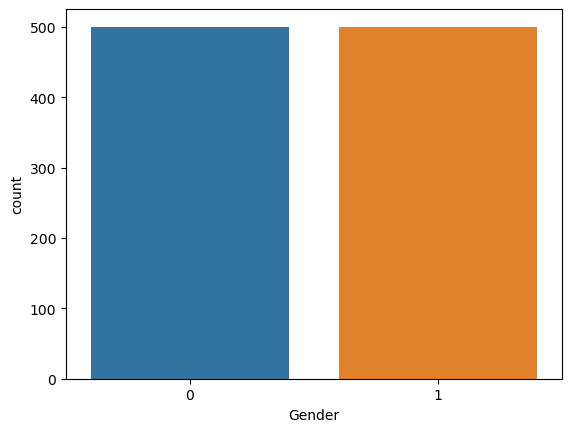

In [23]:
sbn.countplot(x='Gender', data=df)
plt.pyplot.show()

### Scatterplot: Number of Followers / Number of Followings

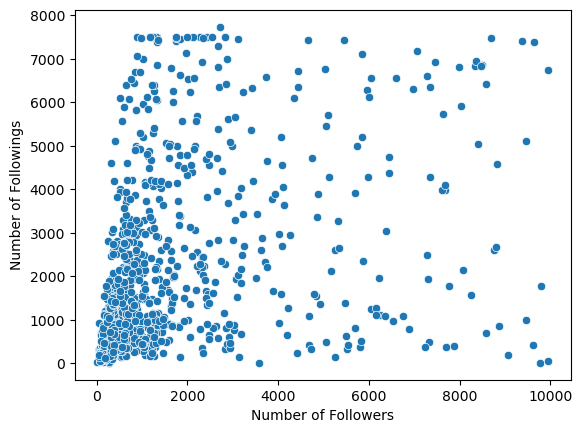

In [24]:
sbn.scatterplot(x='Number of Followers', y='Number of Followings', data=df)
plt.pyplot.show()

### Scatterplot: Number of Followers / Number of Likes for the Tenth Previous Post

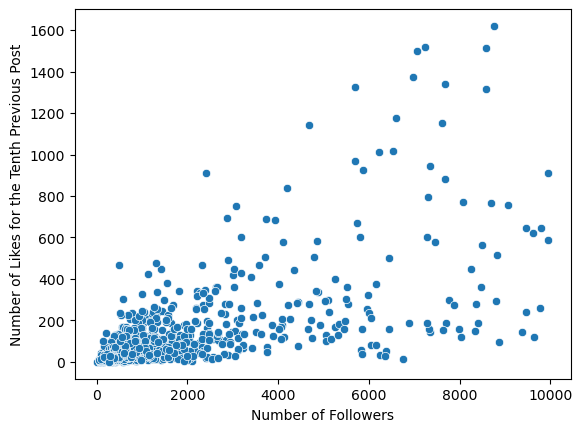

In [25]:
sbn.scatterplot(x='Number of Followers', y='Number of Likes for the Tenth Previous Post', data=df)
plt.pyplot.show()

### Boxplot

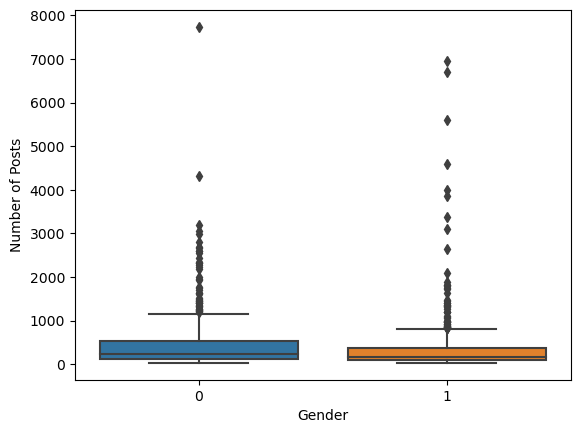

In [26]:
sbn.boxplot(x='Gender', y='Number of Posts', data=df)
plt.pyplot.show()

### Correlation Matrix Heatmap

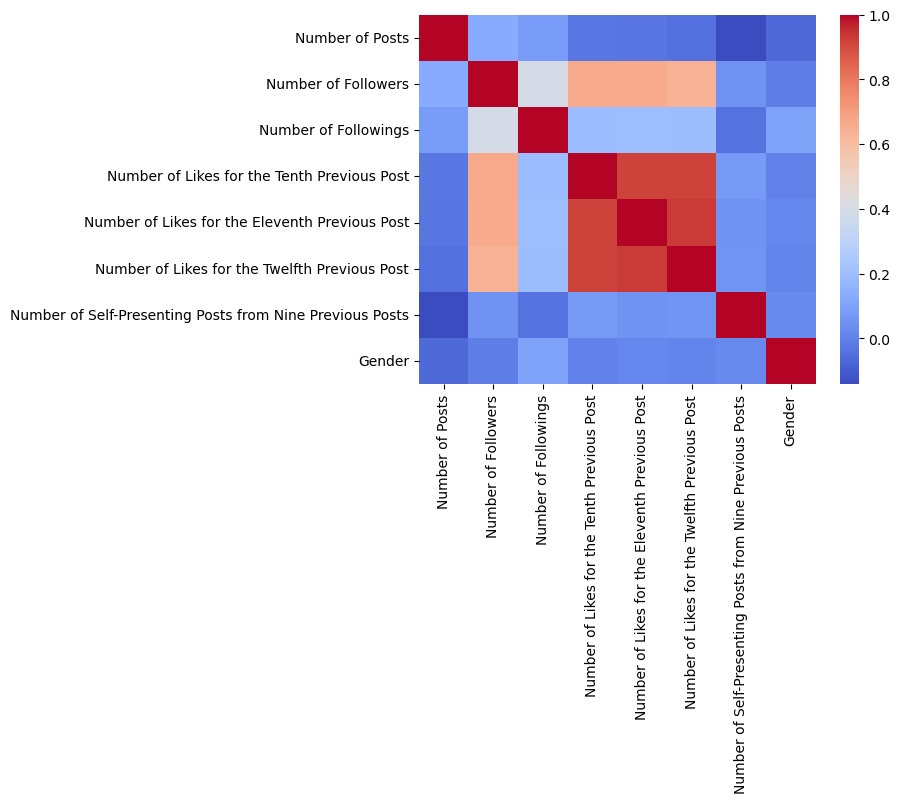

In [27]:
# Create a heatmap of the correlation matrix
sbn.heatmap(corr_matrix, cmap='coolwarm')

plt.pyplot.show()

## Conclusions

<p>
In conclusion, the analysis provides a comprehensive overview of a dataset on dynamics of instagram users, including measures of central tendency and dispersion, correlations between variables, and visualizations to help understand the data. Through this analysis, we can conclude the following in terms of the dynamics of users on Instagram: 
</p>

<ul>
    <li>
    There is a moderate positive correlation (0.392) between the number of followers and followings on Instagram. This suggests that users who have a large number of followers tend to follow a relatively large number of other users, and vice versa.
    </li>
    <li>
    There is a weak positive correlation (0.129) between the number of posts and followers on Instagram. This suggests that users who post more frequently may have a slightly larger following, but the relationship is not particularly strong.
    </li>
    <li>
    There is a weak positive correlation (0.065) between the gender of Instagram users and the number of posts they make. This suggests that, on average, female users may post slightly more frequently than male users.
    </li>
    <li>
    There is a very weak positive correlation (0.010) between the gender of Instagram users and the number of followers they have. This suggests that there is little to no difference between the number of followers that male and female users have on average.
    </li>
</ul>

<p>
In comparing my experience with Python and Excel, I found that there were some key differences in terms of functionality, flexibility, and ease of use.
</p>

<p>
One of the main differences between Python and Excel is that Python offers greater flexibility and customization options. With Python, I was able to create custom functions, manipulate and clean data using a range of libraries, and perform more complex statistical analyses. Excel, on the other hand, is more user-friendly and better suited for creating simple visualizations and conducting basic analyses.
</p>

<p>
In terms of when to use either of them, I think it depends on the specific task at hand. For quick data manipulation and basic analyses, Excel can be a good option. For more complex analyses, machine learning, and custom visualizations, Python would be a better choice.
</p>

<p>
If I could do this assignment over, I would spend more time reviewing and practicing data visualization techniques. While I was able to create basic visualizations using Python, I still feel like there is a lot more to learn in terms of creating effective and impactful visualizations. Additionally, I would work on improving my understanding of statistical concepts to better understand how to visualise meaningful data.
</p>

<p>
Overall, I think the biggest gaps in my programming and stats knowledge are related to more advanced statistical concepts and techniques. While I am comfortable with basic statistical analyses, I feel like there is a lot more to learn in terms of machine learning, time-series analysis, and other more advanced statistical techniques. Additionally, I would like to continue improving my programming skills, particularly in Python, to be able to create more complex and efficient scripts.
</p>